In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder

In [2]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,StackingRegressor 
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# from sklearn import preprocessing 

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
train_df = pd.read_csv("train_v9rqX0R.csv")
#check the info of the dataset
print(train_df.shape)
train_df.info()
print('-'*30)
# resource_data = pd.read_csv("/content/drive/My Drive/ Deep learning assignments/ LSTM Donors_choose/resources.csv")
# #check the info of the dataset
# resource_data .info()

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
------------------------------


In [6]:
train_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [7]:
test_df = pd.read_csv("test_AbJTz2l.csv")
#check the info of the dataset
print(test_df.shape)
test_df.info()
print('-'*30)

(5681, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
------------------------------


In [8]:
train_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [9]:
test_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [10]:
num_columns=['Item_Weight','Item_Visibility','Item_MRP']
# cat_columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
cat_columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Null values

In [11]:
nan_columns=[i for i in train_df.columns if train_df[i].isnull().any()]
nan_columns

['Item_Weight', 'Outlet_Size']

In [12]:
def nan_values(df,feature):
    nan_rows = df[df[feature].isnull()]
    return nan_rows,len(nan_rows)

In [13]:
for i in nan_columns:
    print(i)
    nan_rows,len_nan_rows=nan_values(train_df,i)
    print(len_nan_rows,'-'*5,len_nan_rows/train_df.shape[0])
    nan_rows1,len_nan_rows1=nan_values(test_df,i)
    print(len_nan_rows1,'-'*5,len_nan_rows1/test_df.shape[0])
    print('_'*20)

Item_Weight
1463 ----- 0.1716531737651062
976 ----- 0.17180073930646014
____________________
Outlet_Size
2410 ----- 0.2827642848762173
1606 ----- 0.28269670832599897
____________________


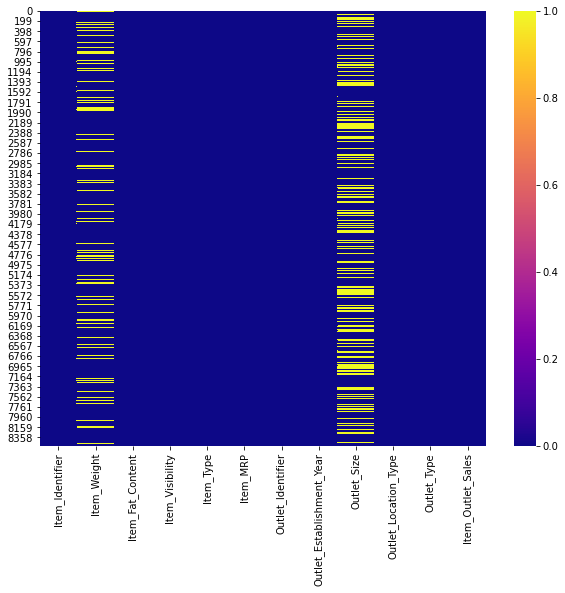

In [14]:
# Checking Null values  
plt.figure(figsize=(10,8))
sns.heatmap(train_df.isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

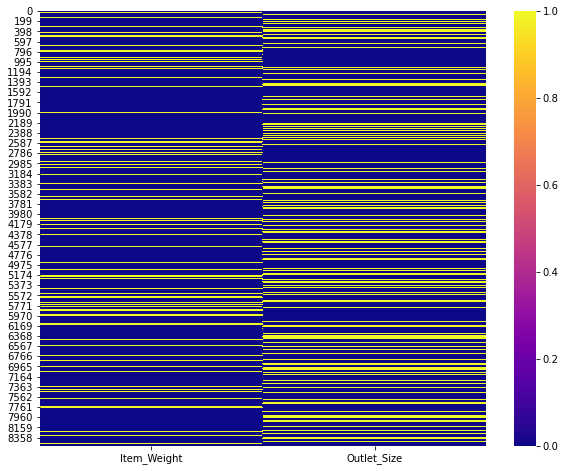

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df[nan_columns].isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

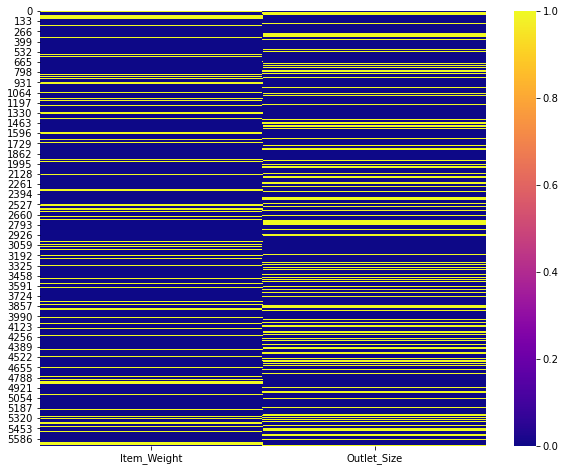

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(test_df[nan_columns].isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

# Observations

1)Item_Weight has around 17% Null values and Outlet_Size has around 28% Null values It is important find a proper imputation as the null data cannot be discarded.<br />
2)Null values of both train and test sets are not on same rows.

# Histogram plots

Plot number :  1


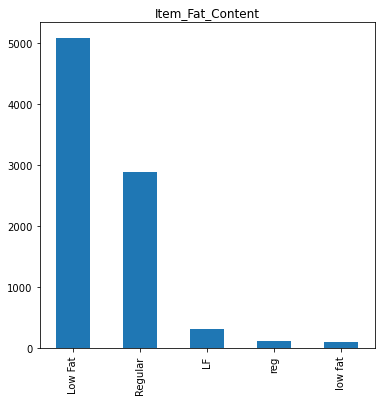

----------------------------------------------------------------------------------------------------
Plot number :  2


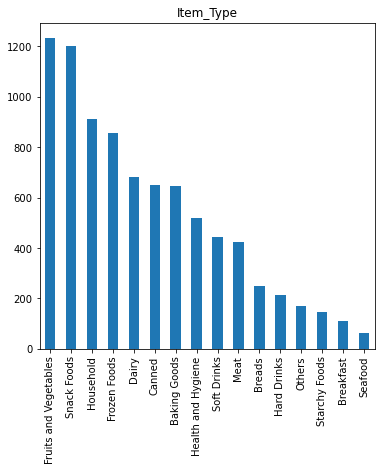

----------------------------------------------------------------------------------------------------
Plot number :  3


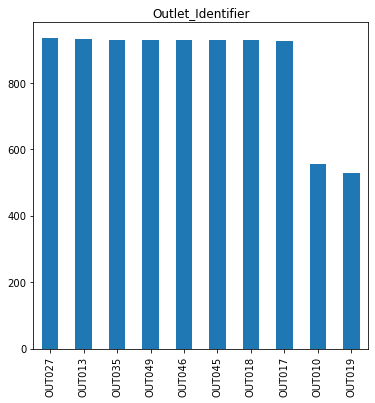

----------------------------------------------------------------------------------------------------
Plot number :  4


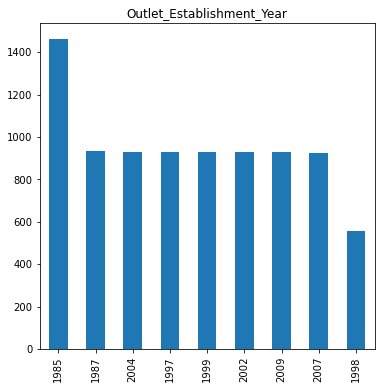

----------------------------------------------------------------------------------------------------
Plot number :  5


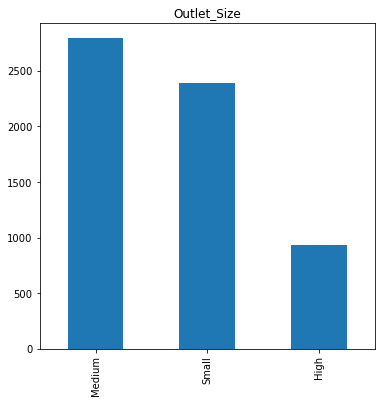

----------------------------------------------------------------------------------------------------
Plot number :  6


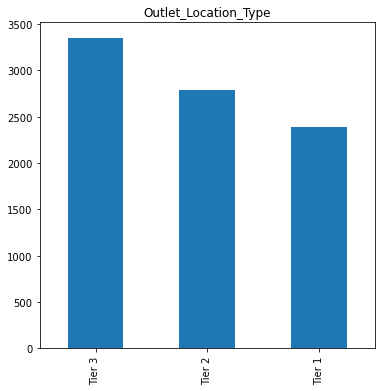

----------------------------------------------------------------------------------------------------
Plot number :  7


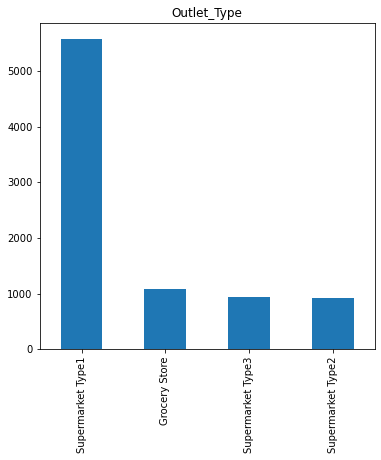

----------------------------------------------------------------------------------------------------


In [17]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.gca() 
    
    counts = train_df[col].value_counts()  
    counts.plot.bar(ax = ax)  
    ax.set_title(col)
    plt.show()
    print('-'*100)

# Observations

1)In Plot number 3 OUT010 and OUT019 are lesser than other outlets make both of them as 1 and remaining as 0. <br />
2)In Plot number 4 two years 1985 and 1998 have different count make features is_1985 and is_1998.<br />
3)In Plot number 7 Supermarket Type1 has highest count make a feature is_Supermarket_Type1.

In [18]:
for i in cat_columns:
    print(i)
    print(train_df[i].value_counts()/len(train_df))
    print('-'*5)
    print(test_df[i].value_counts()/len(test_df))
    print('*'*25)

Item_Fat_Content
Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64
-----
Low Fat    0.597782
Regular    0.340609
LF         0.036261
reg        0.013730
low fat    0.011618
Name: Item_Fat_Content, dtype: float64
*************************
Item_Type
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64
-----
Snack Foods              0.138884
Fruits and Vegetables    0.137476
Household    

# Observations

Distributions of each values in train and test sets are similar.

# Scatter plots

Plot number :  1


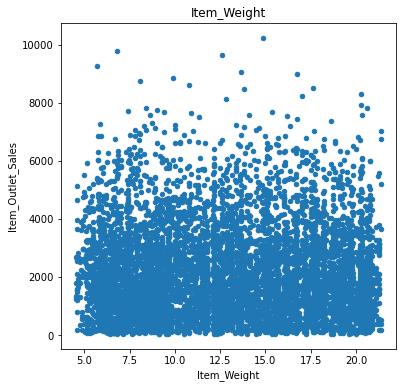

----------------------------------------------------------------------------------------------------
Plot number :  2


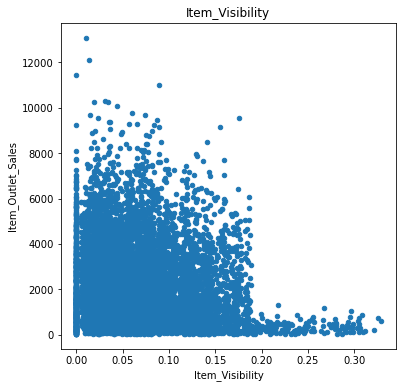

----------------------------------------------------------------------------------------------------
Plot number :  3


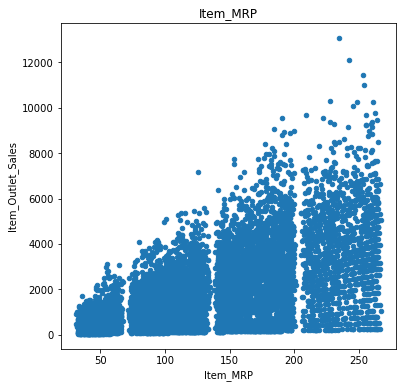

----------------------------------------------------------------------------------------------------


In [19]:
for i in range(len(num_columns)):
    col=num_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    ax.set_title(col)
    train_df.plot.scatter(x = col, y = train_df.columns[-1], ax = ax)
    plt.show()
    print('-'*100)

In [20]:
#exact boundary for cluster is found by sorting the mrp values and looking at missing numbers.
for i in np.sort(train_df['Item_MRP']):
    print(i)

31.29
31.49
31.89
31.9558
31.9558
32.0558
32.09
32.3558
32.4558
32.49
32.6558
32.6558
32.8558
32.8558
32.8558
32.89
32.9216
32.9558
32.99
33.0558
33.1216
33.1216
33.1558
33.2216
33.2874
33.2874
33.3558
33.3558
33.3874
33.3874
33.39
33.39
33.4558
33.4874
33.5874
33.6216
33.6558
33.6874
33.6874
33.7216
33.7874
33.79
33.8874
33.89
33.9216
33.9874
34.0532
34.0532
34.2216
34.2216
34.2532
34.3216
34.3532
34.3532
34.3558
34.3874
34.3874
34.4558
34.4874
34.5532
34.5532
34.5558
34.5558
34.619
34.619
34.6532
34.6874
34.719
34.7532
34.7558
34.819
34.8216
34.8216
34.8558
34.919
34.919
34.9532
34.9558
34.9558
34.9558
34.9558
34.9874
34.9874
35.019
35.019
35.0558
35.0874
35.0874
35.1216
35.1216
35.1532
35.1558
35.219
35.2532
35.2558
35.2874
35.2874
35.2874
35.3558
35.4216
35.4216
35.4558
35.4874
35.4874
35.519
35.5558
35.6848
35.6848
35.6874
35.6874
35.7216
35.7216
35.7532
35.7558
35.7558
35.8848
35.919
35.919
35.9558
35.9874
36.019
36.0848
36.0848
36.119
36.1506
36.1874
36.1874
36.2216
36.2506
36.2

# Observation

1)In Plot number 3 there seems to be some form of clustering make a feature to extract this information 0 to 70 as 0,70 to 135 as 1 ,135 to 202 as 2 and greater than 202 as 3.<br />
2)In Plot number 2 the Item_Visibility looks like right skewed distribution use log of that column as an feature.<br />
 

# Boxplots

Plot number :  1


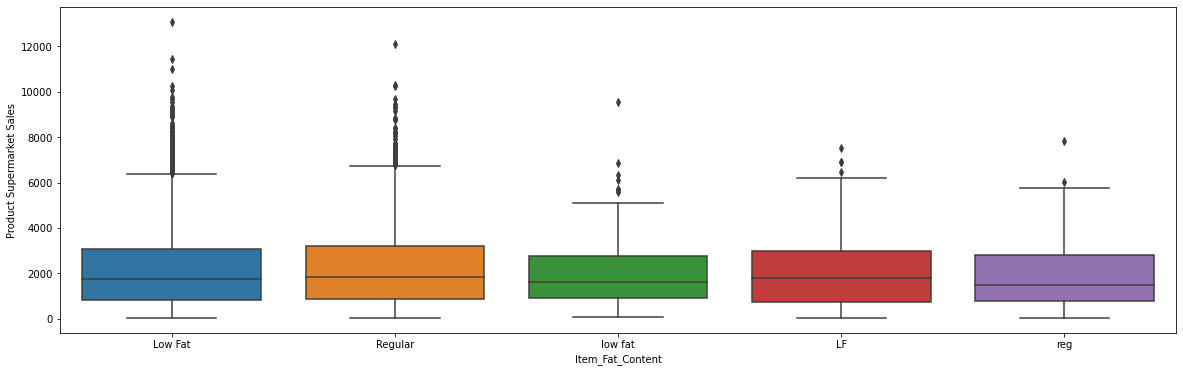

----------------------------------------------------------------------------------------------------
Plot number :  2


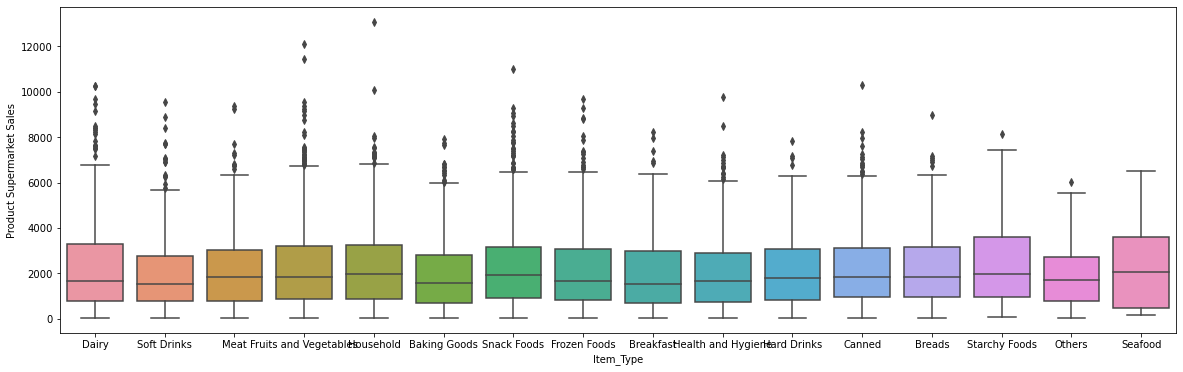

----------------------------------------------------------------------------------------------------
Plot number :  3


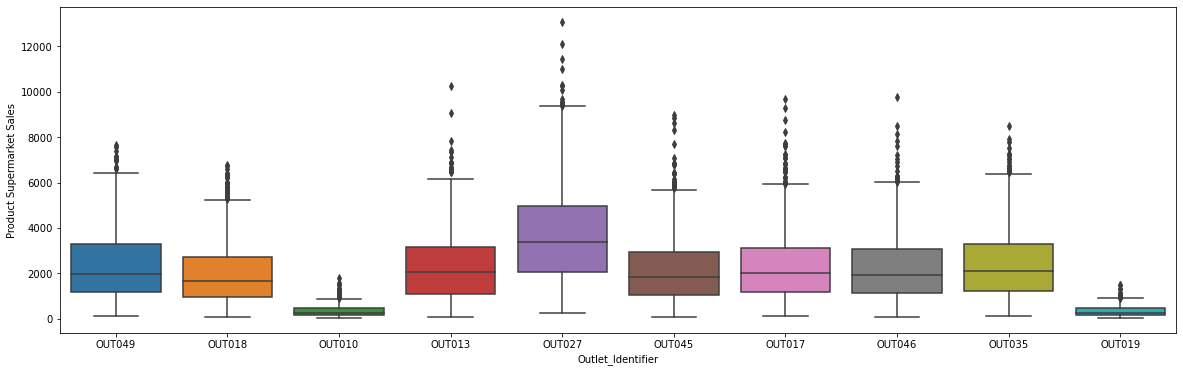

----------------------------------------------------------------------------------------------------
Plot number :  4


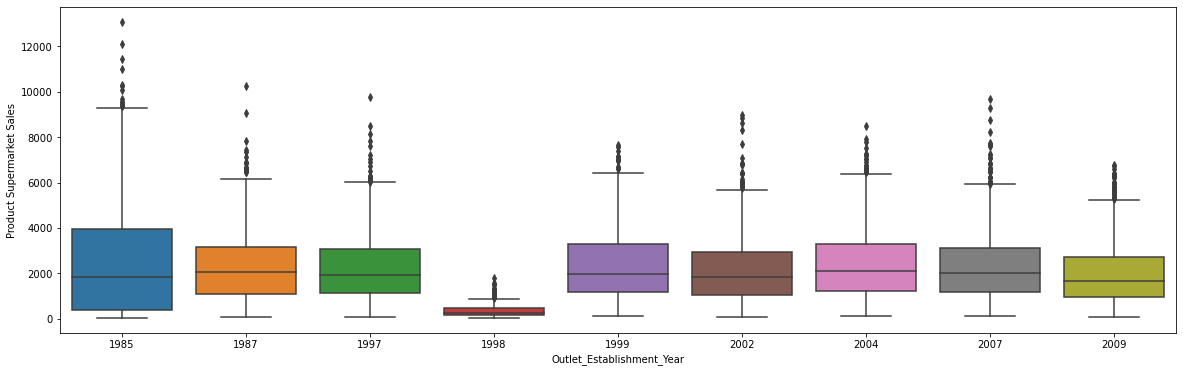

----------------------------------------------------------------------------------------------------
Plot number :  5


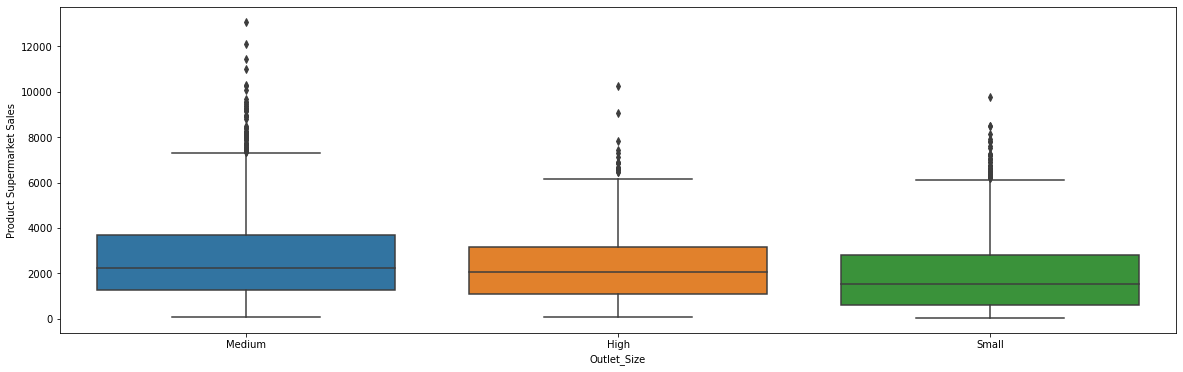

----------------------------------------------------------------------------------------------------
Plot number :  6


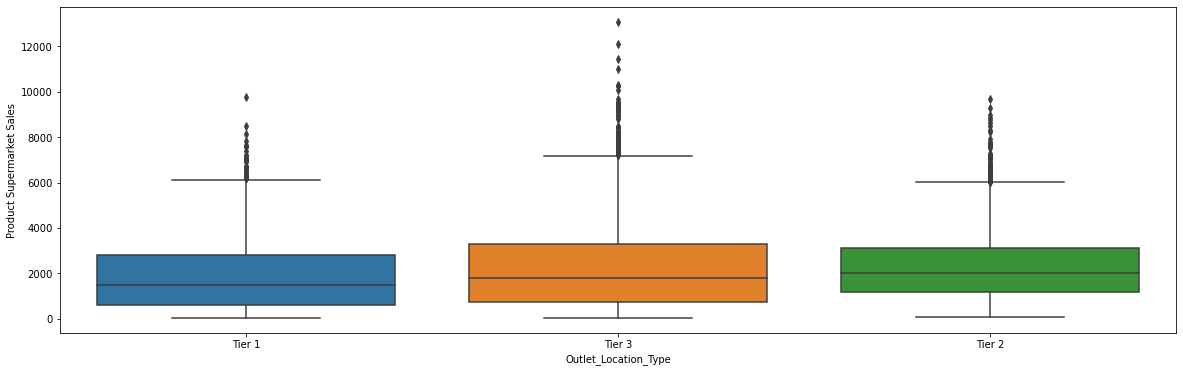

----------------------------------------------------------------------------------------------------
Plot number :  7


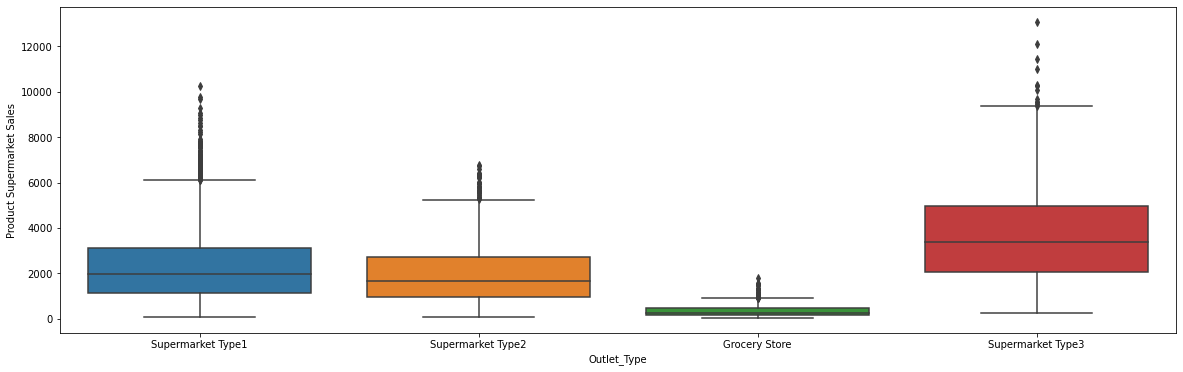

----------------------------------------------------------------------------------------------------


In [21]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(20,6))
    sns.boxplot(col,train_df.columns[-1], data=train_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
    print('-'*100)

# Obserations

1)In Plot number 3 OUT010 and OUT019 have lesser sales than other outlets make both of them as 1 and remaining as 0.<br />
2)In Plot number 4 in the year 1998 the sales have been least create a feature is_1998.<br />
3)In Plot number 7 Grocery store has least sales make a feature is_Grocery_Store.

# Violinplots

Plot number :  1


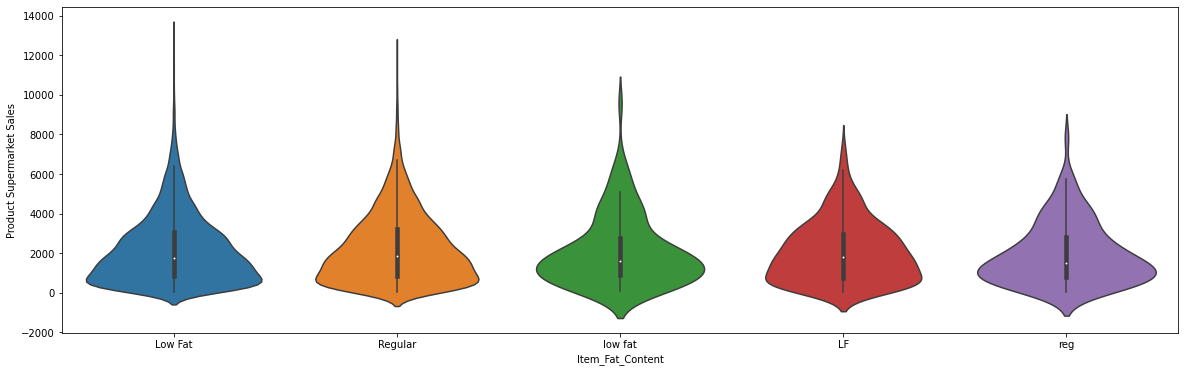

----------------------------------------------------------------------------------------------------
Plot number :  2


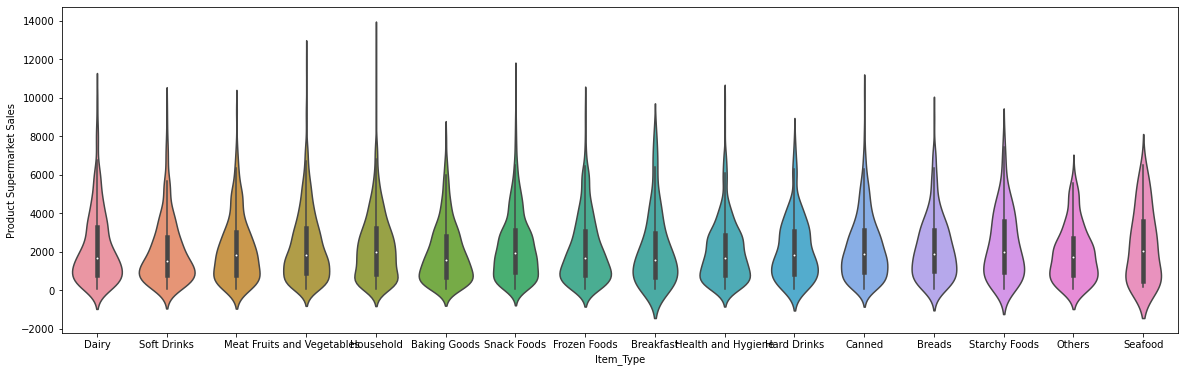

----------------------------------------------------------------------------------------------------
Plot number :  3


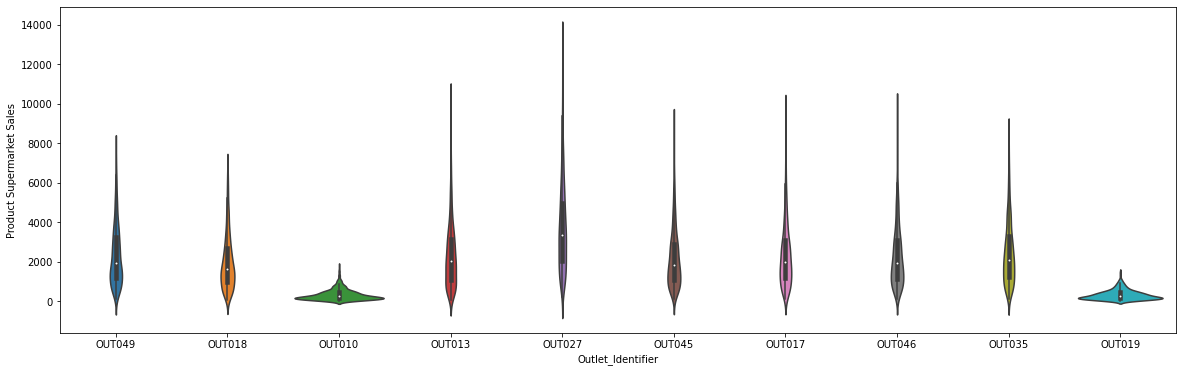

----------------------------------------------------------------------------------------------------
Plot number :  4


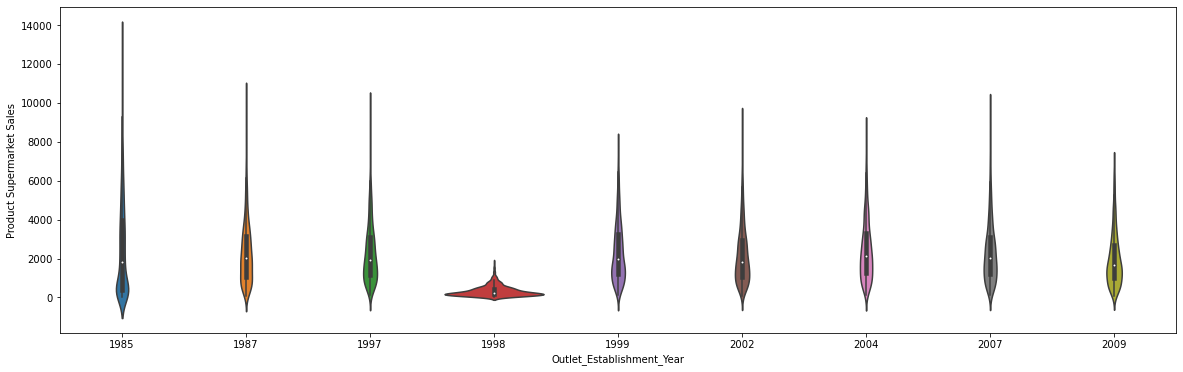

----------------------------------------------------------------------------------------------------
Plot number :  5


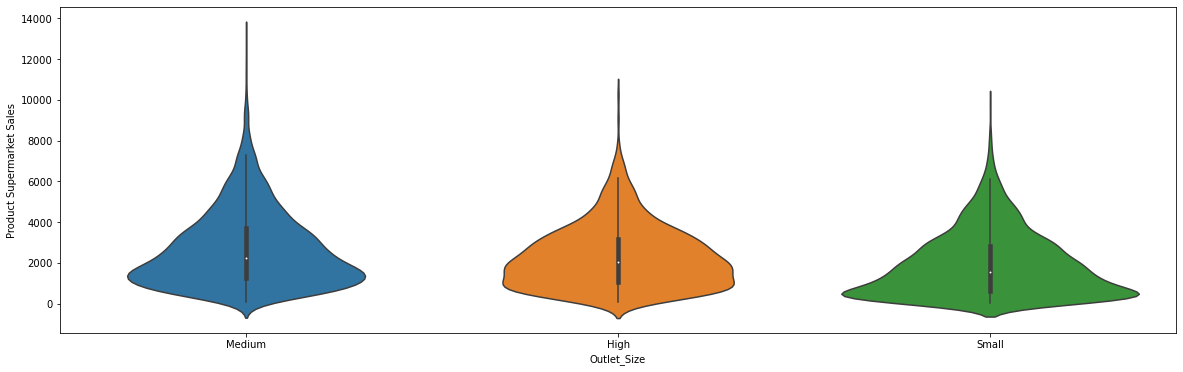

----------------------------------------------------------------------------------------------------
Plot number :  6


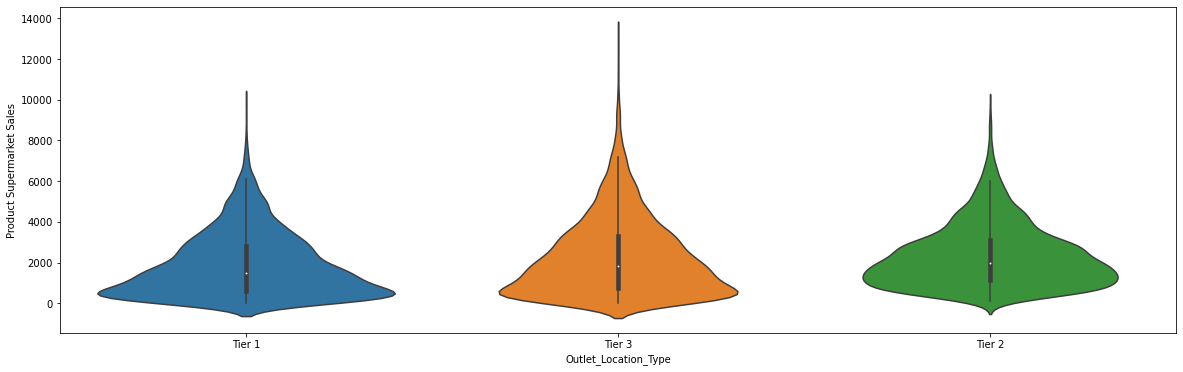

----------------------------------------------------------------------------------------------------
Plot number :  7


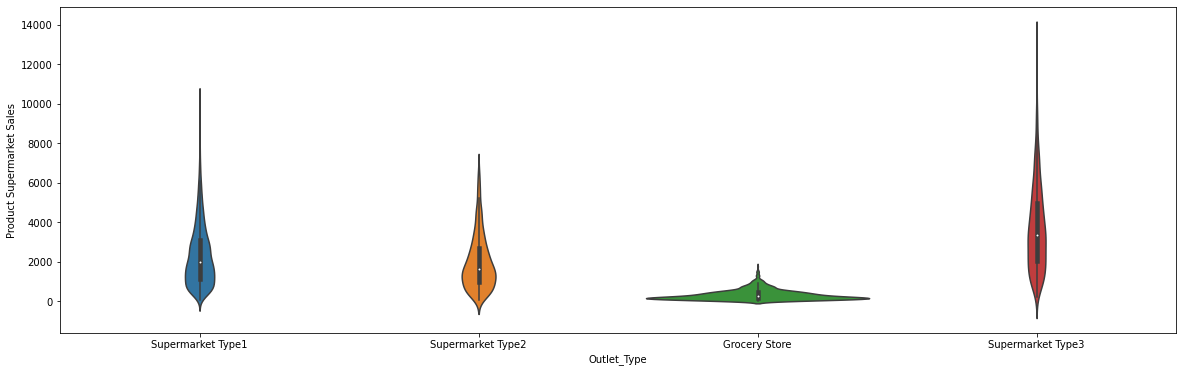

----------------------------------------------------------------------------------------------------


In [22]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(20,6))
    sns.violinplot(col,train_df.columns[-1], data=train_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
    print('-'*100)

# Correlation matrix

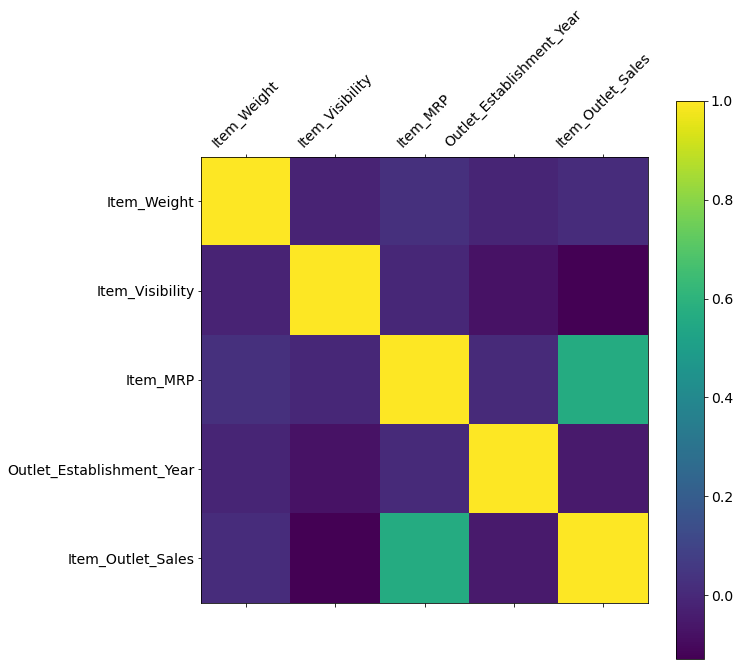

In [23]:
f = plt.figure(figsize=(10, 10))
plt.matshow(train_df.corr(), fignum=f.number)
plt.xticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Observation

None of the values are highly correlated with output and Item_MRP is slightly more correlated  than others.

# Pairplots

Plot number :  1


<Figure size 1440x432 with 0 Axes>

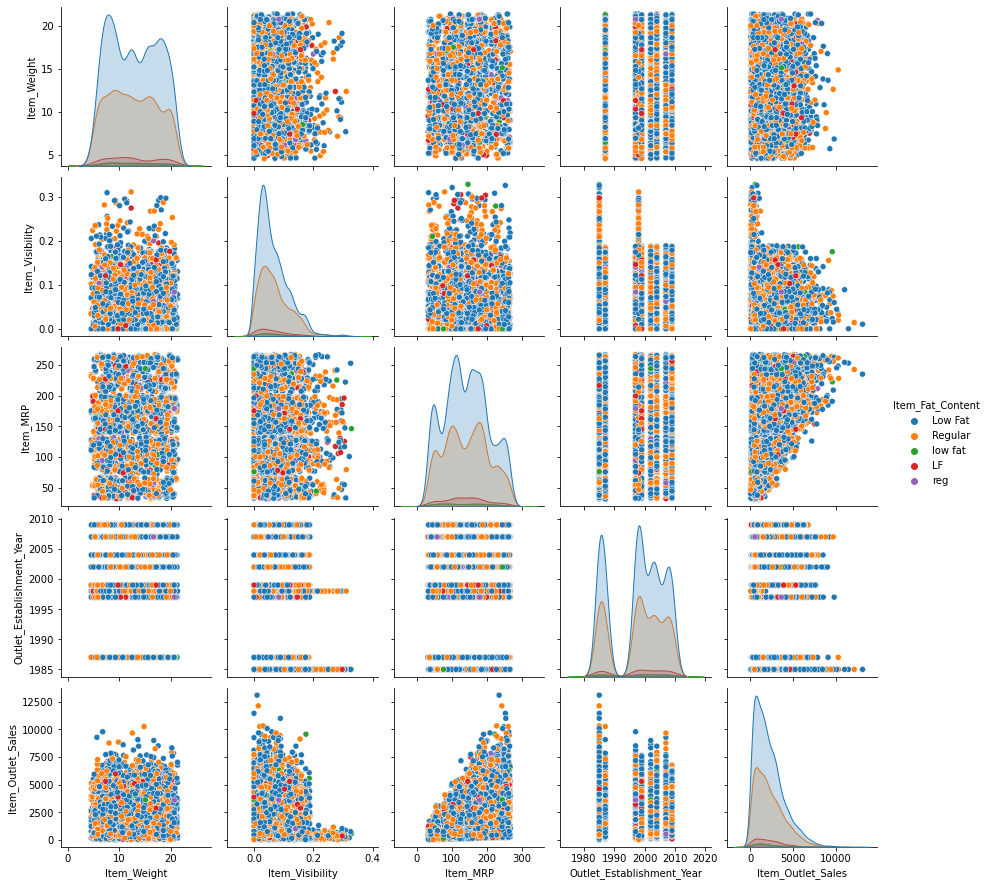

----------------------------------------------------------------------------------------------------
Plot number :  2


<Figure size 1440x432 with 0 Axes>

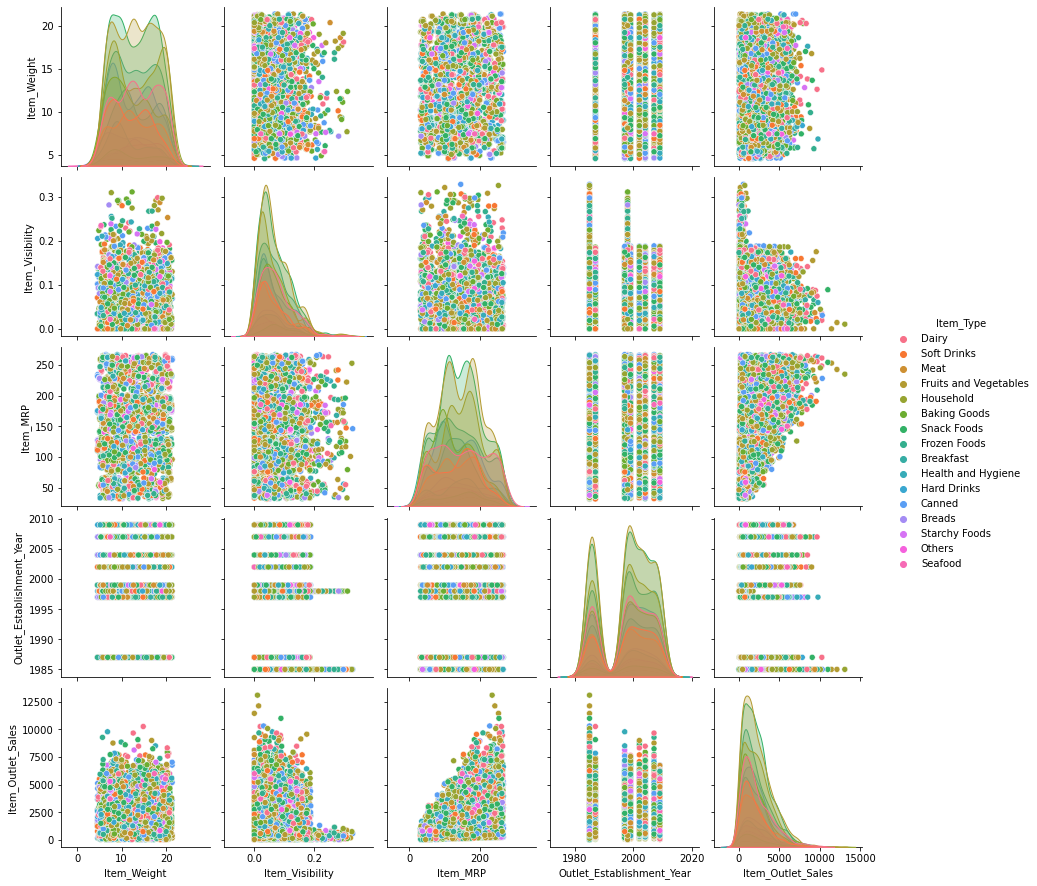

----------------------------------------------------------------------------------------------------
Plot number :  3


<Figure size 1440x432 with 0 Axes>

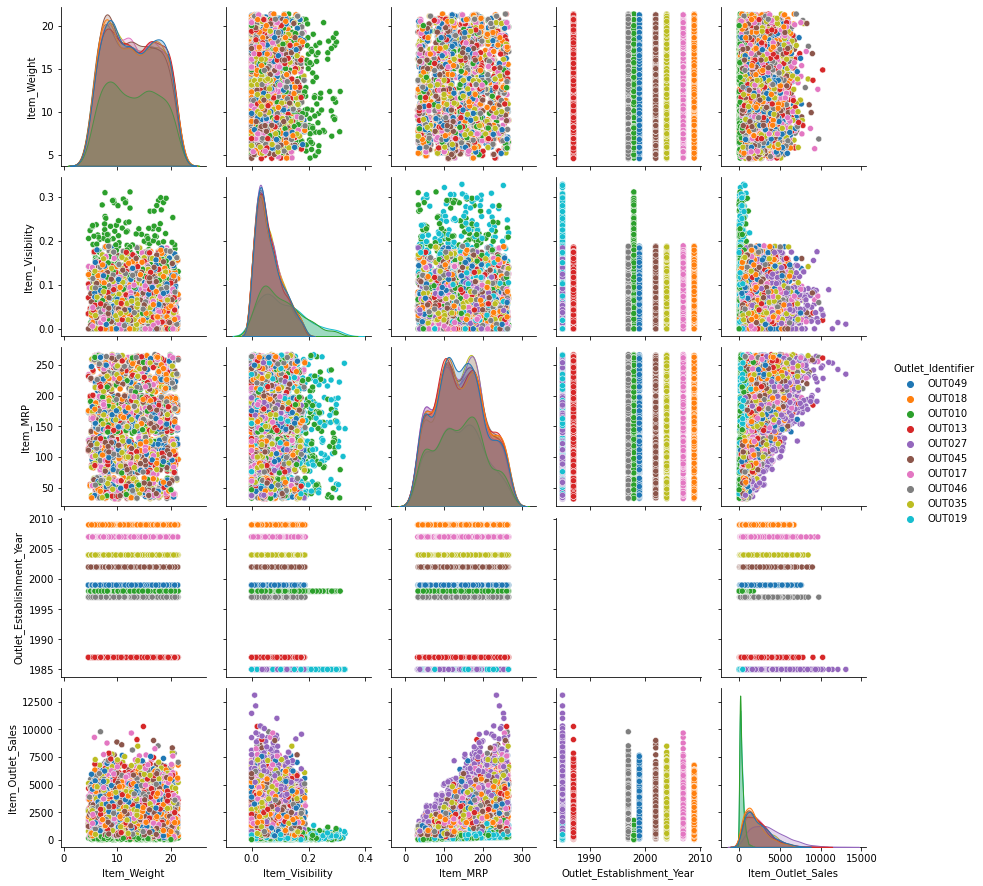

----------------------------------------------------------------------------------------------------
Plot number :  4


<Figure size 1440x432 with 0 Axes>

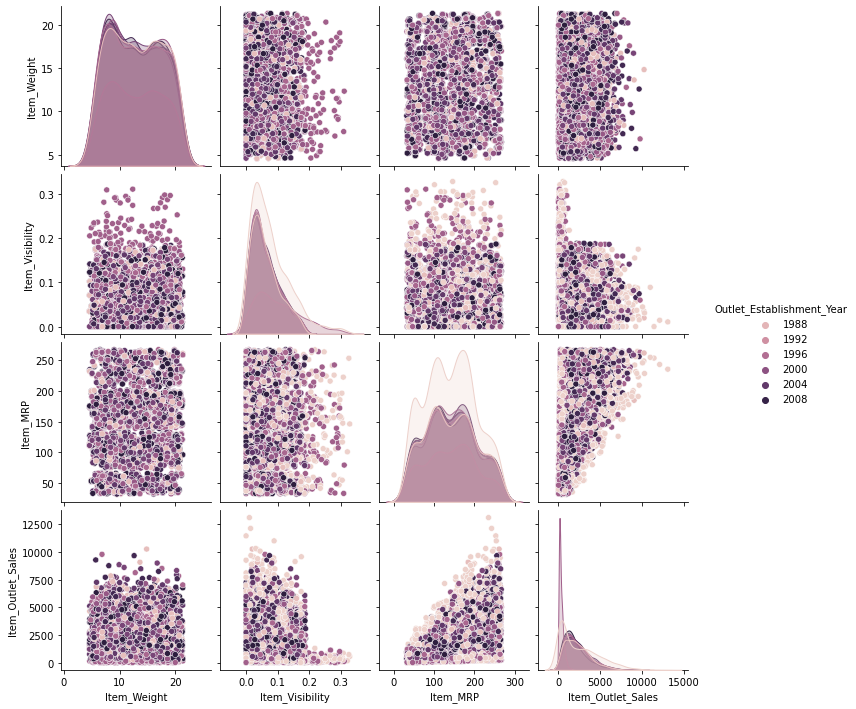

----------------------------------------------------------------------------------------------------
Plot number :  5


<Figure size 1440x432 with 0 Axes>

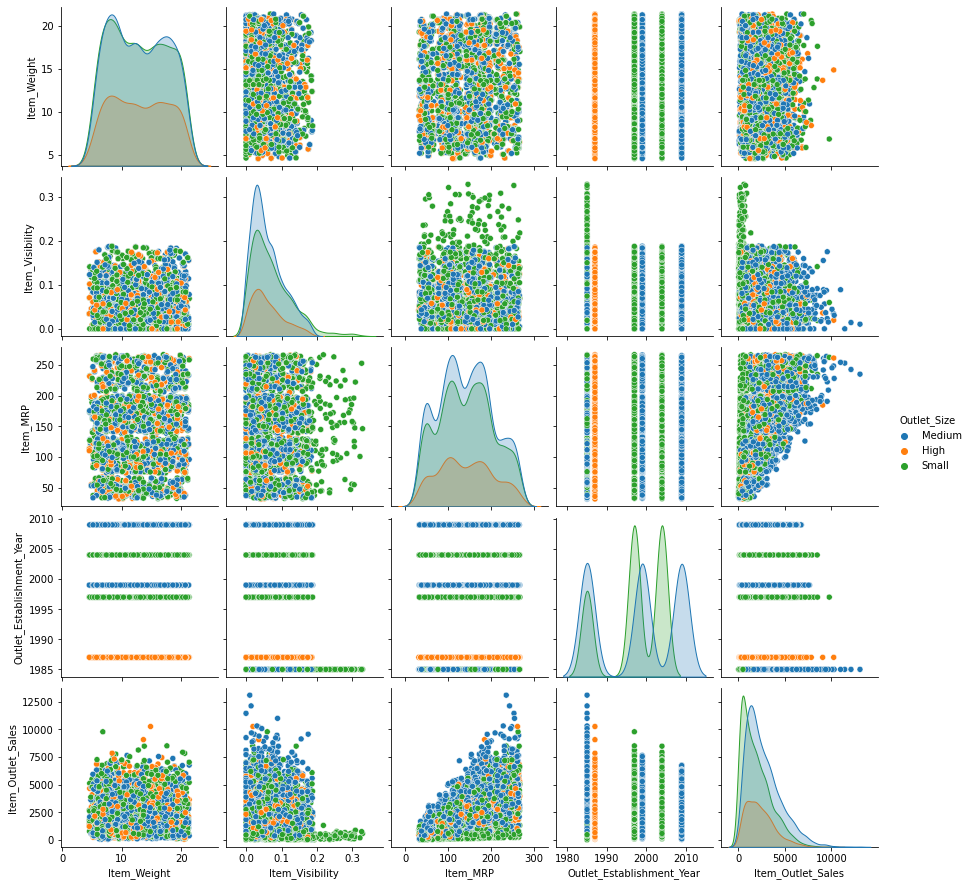

----------------------------------------------------------------------------------------------------
Plot number :  6


<Figure size 1440x432 with 0 Axes>

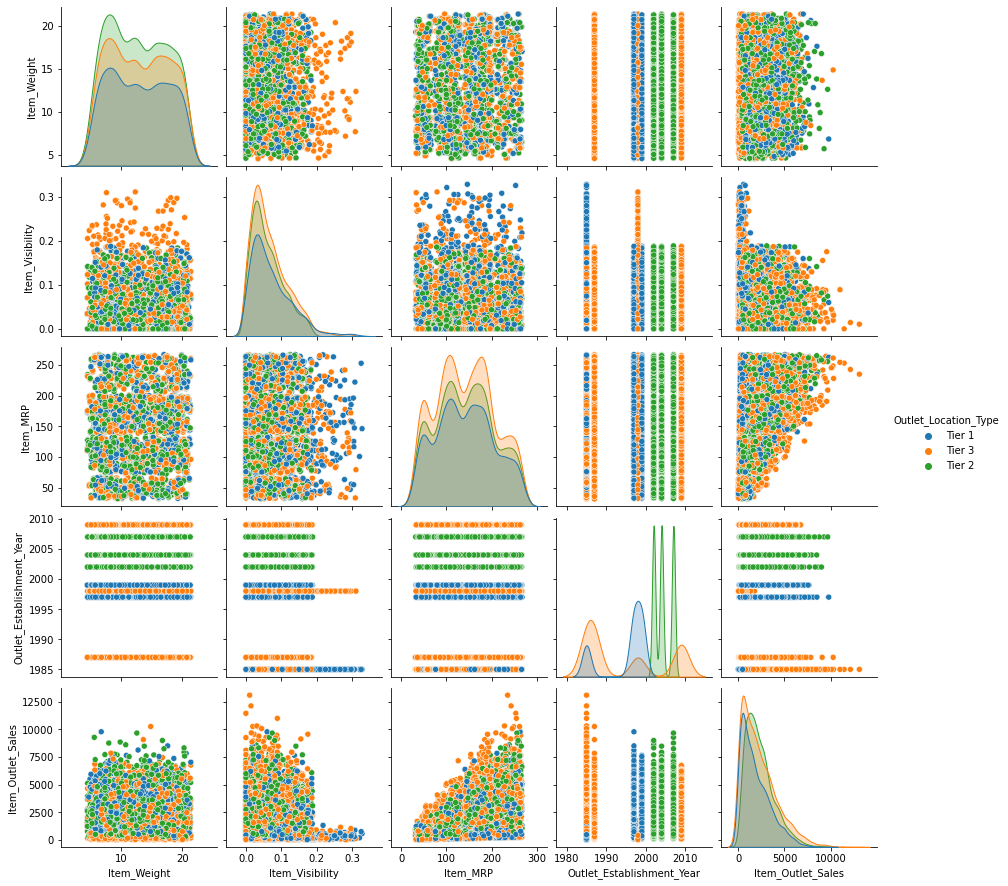

----------------------------------------------------------------------------------------------------
Plot number :  7


<Figure size 1440x432 with 0 Axes>

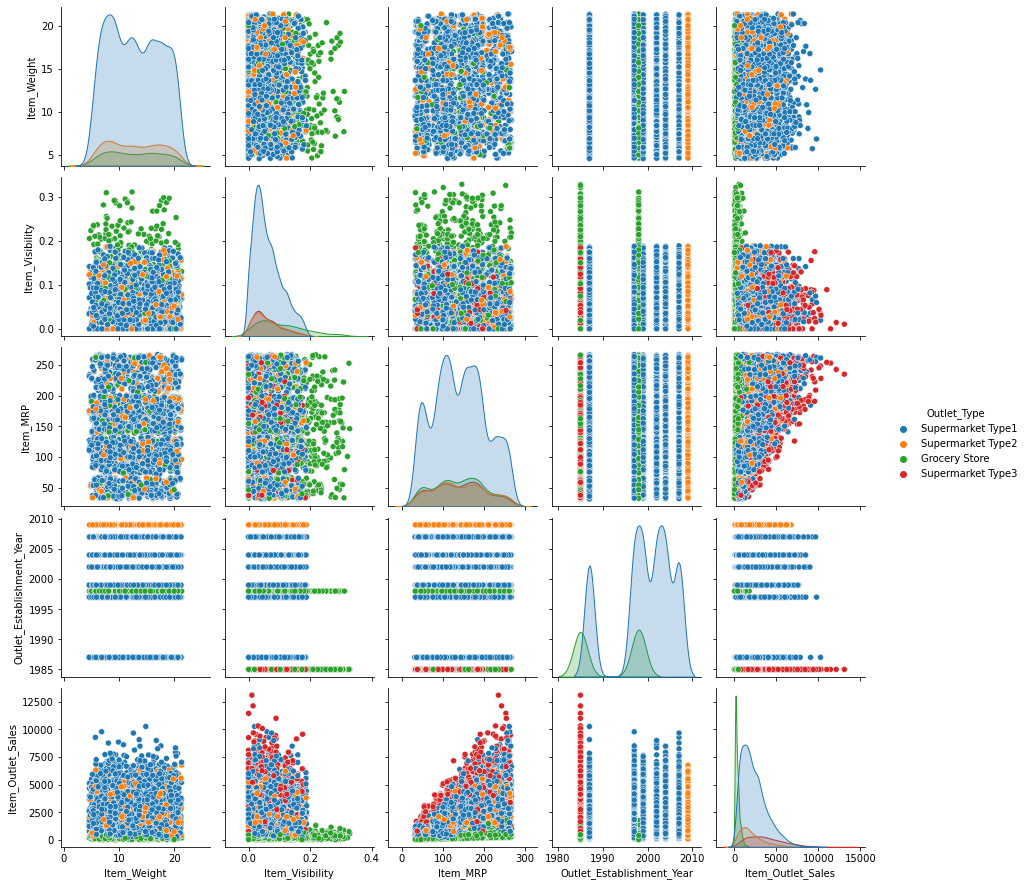

----------------------------------------------------------------------------------------------------


In [24]:
for i in range(len(cat_columns)):
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(20,6))
    sns.pairplot(train_df,hue=cat_columns[i]) 
    plt.show()
    print('-'*100)

# Observations

1)In Plot number 1 There seems to be mainly two categories Low fat and Regular combine other minor categories with similar names.<br /> 
2)In Plot number 3 Item_visibility vs Item_Outlet_Sales OUT010 and OUT019 are clearly seperated create a featue for them.<br />
3)In Plot number 5 Outlet_size Small has some sort of seperation create a feature is_small.<br />
4)In Plot number 7 Outlet_Type Grocery_store has some sort of seperation with Item_visibility and Item_MRP as it is scattered on left side of the plot.Create a feature is_Grocery_Store.<br />
5)In Plot number 7 Outlet_Type Supermarket_Type3 has some sort of seperation with Item_visibility and Item_MRP as it is scattered on the boundary of the plot.Create a feature is_Supermarket_Type3.<br />
6)In all the plots the Outlet_Establishment_Year has two clusters before 1990 and after 1990 create a feature before_1990.